In [2]:
import numpy as np
import pygad
import matplotlib.pyplot as plt
from matplotlib import cm

# 2D Evolutivo

In [3]:
def rosenbrock(solution, solution_idx):
    x = solution
    x1 = x[1::]
    x2 = x[0:-1]
    factor1 = (x1-x2 ** 2) ** 2
    factor2 = (1 -x2) ** 2
    output = 100 * np.sum(factor1 + factor2)
    fitness = -output
    return(fitness)
def rosenbrock_2d(x, y):
    fx=((1-x)**2) + (100*(y-(x**2))**2)
    return fx

In [4]:
ga_instance_rosenbrock = pygad.GA(num_generations=50,
                       num_parents_mating=2,
                       fitness_func=rosenbrock,
                       sol_per_pop=10,
                       num_genes=2,
                       init_range_low=-5,
                       init_range_high=5,
                       parent_selection_type="sss",
                       keep_parents=1,
                       crossover_type="single_point",
                       mutation_type="random",
                       mutation_percent_genes=10,
                       save_solutions=True)

c:\Users\practicante estrate\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:522: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))
c:\Users\practicante estrate\AppData\Local\Programs\Python\Python311\Lib\site-packages\pygad\pygad.py:940: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, o

In [5]:
ga_instance_rosenbrock.run()
soluciones_rosenbrock = ga_instance_rosenbrock.solutions
soluciones_rosenbrock=np.array(soluciones_rosenbrock)
x_min=ga_instance_rosenbrock.best_solution()

punto optimo: (1.0,1.0)
valor optimo:  -0.02


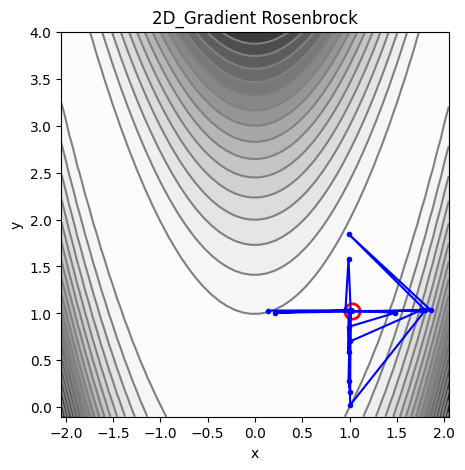

In [10]:
def plot_contour():

    X = np.linspace(start=-2.048, stop=2.048, num=50)
    Y = np.linspace(start=-0.1, stop=4.0, num=50)
    X, Y = np.meshgrid(X, Y)
    Z = rosenbrock_2d(X, Y)

    plt.subplots(figsize=(5, 5))
    plt.gca().contourf(X, Y, Z, cmap=cm.Greys, levels=20, alpha=1.0)
    plt.gca().contour(X, Y, Z, colors="gray", levels=20)
    plt.plot(x_min[0][1],x_min[0][1], "o", color="red", fillstyle="none", markersize=11, markeredgewidth=2)
    plt.plot(x_min[0][1],x_min[0][1], ".", color="red")
    plt.title("2D_Gradient Rosenbrock")
    plt.xlabel("x")
    plt.ylabel("y")
print("punto optimo: ({},{})".format(round(x_min[0][0],1),round(x_min[0][1],1)))
print("valor optimo: ",round(x_min[1],2))
d=len(soluciones_rosenbrock)-20
plot_contour()
#ultimas 20 generaciones
plt.plot(soluciones_rosenbrock[d:,0],soluciones_rosenbrock[d:,1], ".-", color="b")
plt.show()

# 3D Evolutivo

In [20]:
def rosenbrock_3d(x,solution_idx):
    fx=((1-x[0])**2) + (100*(x[1]-(x[0]**2))**2) + ((1-x[1])**2) + (100*(x[2]-(x[1]**2))**2)
    return -fx

# Crea la población inicial
num_generations = 10000
num_parents_mating = 50
sol_per_pop = 100
num_genes = 3

init_range_low = -2
init_range_high = 2

parent_selection_type = "sss"
keep_parents = -1

ga_instance_3d = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       fitness_func=rosenbrock_3d)

In [21]:
ga_instance_3d.run()
soluciones_rosenbrock = ga_instance_3d.solutions
soluciones_rosenbrock=np.array(soluciones_rosenbrock)
x_min_3d=ga_instance_3d.best_solution()

In [23]:
print("punto optimo: ({},{},{})".format(round(x_min_3d[0][0],0),round(x_min_3d[0][1],0),round(x_min_3d[0][2],0)))
print("valor optimo: ",round(x_min_3d[1],2))


punto optimo: (1.0,1.0,1.0)
valor optimo:  -0.05
